# 🧪 Young's Double Slit Experiment

This notebook shows a famous quantum physics experiment — the **Double-slit experiment**. It forms the foundation of understanding the **Wave-Particle Duality** and the **Superposition Principle** — both critical to understanding how **qubits** behave in quantum computing.

The goal is to help you intuitively understand:
- How quantum systems evolve without measurement
- How measurement changes everything — collapsing uncertainty into certainty
- How this mirrors the behavior of **qubits** in quantum computing

> Think of this experiment as your first step toward understanding what it means for something to be in a **quantum state** — and how observing that state changes the game.

In this simulation:

- We model how an quantum particles behaves when fired at a double slit **without measurement**, showing an **interference pattern** that proves the wave-like behavior of particles.
- Then, we simulate what happens when a **detector** is placed at the slits, causing the quantum particles to behave like a classical particle — collapsing the wavefunction into a definite path (slit A or slit B).
- This behavior is **analogous to how a qubit collapses to a basis state** (|0⟩ or |1⟩) upon measurement.

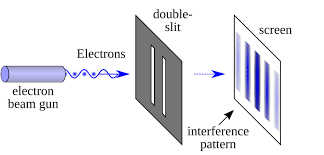

---

[For detailed Explaination](https://courses.lumenlearning.com/suny-physics/chapter/27-3-youngs-double-slit-experiment/)

For interactive learning follow this notebook

---

## Understanding the Wave Nature of the Quantum Particles(Electrons, Photons,...etc)

When an electron passes through a double slit, it behaves like a **probabilistic wave**. This means the electron doesn't take one path or the other, but exists in a **superposition of all possible paths**.

In quantum computing, this is analogous to a **qubit** being in a superposition state like:

$$
|\psi\rangle = \alpha |0\rangle + \beta |1\rangle
$$

where $ |0\rangle   and   |1\rangle  $ represent the electron going through **Slit A** and **Slit B**, respectively.

The resulting **interference pattern** on the screen arises because the probability amplitudes of different paths interfere, much like waves.

This shows that until measured, the electron doesn't "choose" a slit — it explores **all possibilities** simultaneously.


---

<h2 style="color:red">We will first explore the Young's double-slit experiment, and then simulate a similar experiment using quantum circuits.</h2>


---

# Start Experiment

In [10]:
from helpers.double_slit import *

In [11]:
db=DoubleSlit(slit_dist=4,distance_to_screen=10,screen_width=200,screen_height=100)

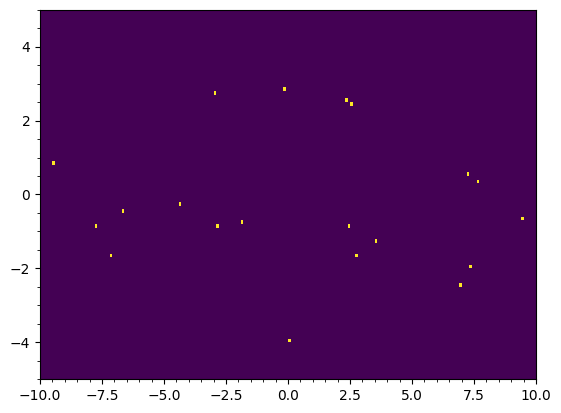

In [12]:
db.electron_beam(num_electrons=20)
db.show_screen()

It seems obvious that we would observe the electron on the screen—nothing surprising there, right?
Now, let's try increasing the number of electrons.

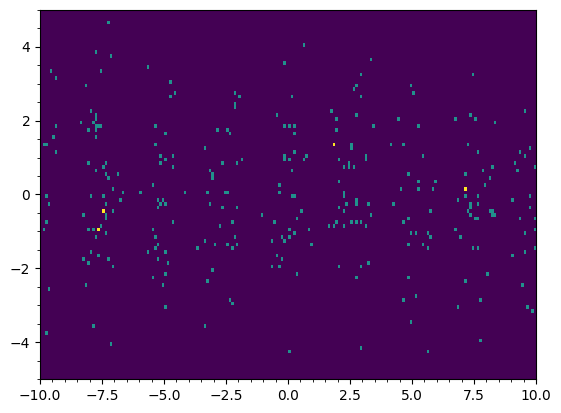

In [13]:
db.electron_beam(num_electrons=300)
db.show_screen()

As we continue increasing the number of electrons, more of them appear on the screen, filling different areas.Its seems that the electrons do not follow a fixed pattern; instead, they spread randomly, creating scattered bright spots.

---

What if we increase the no of electrons?

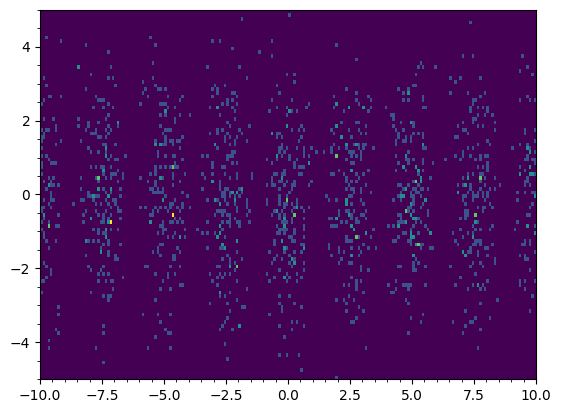

In [14]:
db.electron_beam(num_electrons=1500)
db.show_screen()

Now, here's where the interesting phenomenon begins: as we increase the number of electrons fired at the screen, a distinct pattern of alternating light and dark patches starts to appear. This pattern isn't random—it's known as an **interference pattern**, characteristic of **waves**. This result comes from the famous **Young's double-slit experiment**, which shows that even individual particles like electrons exhibit **wave-like behavior**. Remarkably, this demonstrates the principle of **wave-particle duality**—electrons behave both as particles and as waves, depending on how we observe them.


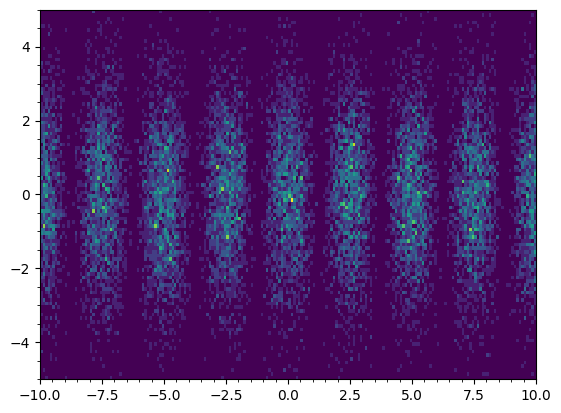

In [15]:
db.electron_beam(num_electrons=15000)
db.show_screen()

So in both cases:

- **One trial** → looks classical (a dot on screen or a single bit)
- **Many trials** → reveals the **underlying quantum probability**

This helps us build intuition for quantum mechanics:  
> Quantum systems are described by probabilities — but we only observe those probabilities by **repeating experiments** and analyzing the outcomes statistically.

---

## Introducing a Detector: The Collapse of the Qubit

When we place a detector at the slits, we're effectively **measuring the electron's path**. This is like **measuring a qubit**.

Measurement in quantum mechanics **collapses** the wavefunction into one of the basis states. The electron is no longer in a superposition of going through both slits. It is either:

- Detected at **Slit A** → collapses to $ |0\rangle $
- Detected at **Slit B** → collapses to $ |1\rangle $

This is why the interference pattern disappears when a detector is placed — the **act of measurement destroys superposition**, and hence, **interference**.


> Remember: This isn't about measurement limitations - it's showing how quantum particles actually behave at a fundamental level. Fascinating, right?


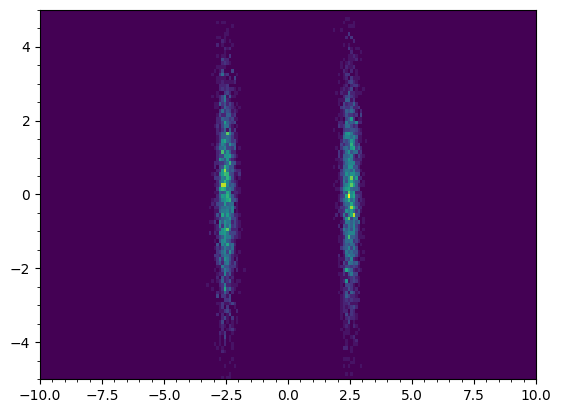

In [16]:
## Use measure_slit=True to measure the electorn
db2=DoubleSlit(slit_dist=5,distance_to_screen=5,screen_width=200,screen_height=100,measure_slit=True)
db2.electron_beam(num_electrons=5000)
db2.show_screen()

---

## Quantum Circuit Approach

We would now have a look on how we can map the double slit experiment onto Quantum Circuit and run this on real quantum process.

---

**What is a qubit?**  
Any quantum particle can serve as a qubit—in this case, we'll use an electron as our example.  

An electron has two possible spin states: **spin-up** and **spin-down**, which correspond to the quantum states $|0\rangle$ and $|1\rangle$, respectively.



---

We start with the qubit initialized in state $|0\rangle$. We then apply the HADAMARD gate which places qubit in equal superposition of $|0\rangle$ and $|1\rangle$ i.e 

 $$ {\frac{1}{\sqrt2}} (|0\rangle + |0\rangle)$$

```
Which is equivalent to the slit in the double slit experiment, where we have the wave function of a particle in a superposition of going through the top slit and the bottom slit.

Now we apply the PHASE Gate which is responsible in adding a relative phase between state  $|0\rangle$ and $|1\rangle$. So, the wave function evolved as 

$$
\frac{1}{\sqrt{2}} \left( |0\rangle + e^{i\varphi} |1\rangle \right)
$$

*So, what does it physically mean?*

Imagine an electron with two possible spin states: spin-up and spin-down, where the state $|0\rangle$ represents the electron pointing up, and the state $|1\rangle$ represents it pointing down.

A superposition of $|0\rangle$ and $|1\rangle$ means the electron's spin is pointing somewhere in between—for example, out of the screen. Changing the phase of this superposition corresponds to rotating the electron's spin in the plane perpendicular to the base states ($|0\rangle$ and $|1\rangle$).

```
So, what does this phase represent in the double-slit experiment analogy?

In this analogy, we're changing the relative phase of the wave emerging from the bottom slit with respect to the wave from the top slit. This is exactly what we observe in Young's double-slit experiment: as we move along the screen, the relative phase between the incoming waves changes due to the difference in the path lengths they travel.

So essentially, changing the angle $\varphi$ is analogous to moving along the Y-coordinate of the screen—where different positions correspond to different phase differences between the two interfering waves.

Now we again apply the hadamard gate, which split the wave into the superposition if the top and bottom slit

$$
\frac{1}{\sqrt{2}} \left[ \frac{1}{\sqrt{2}} (|0\rangle + |1\rangle) + e^{i\varphi} \cdot \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle) \right] =
$$
Doing some mathematics we observe
$$
\frac{1}{2} \left[ (1 + e^{i\varphi}) |0\rangle + (1 - e^{i\varphi}) |1\rangle \right] =
$$

$$
e^{i\varphi/2} \left[ \left( \frac{e^{-i\varphi/2} + e^{i\varphi/2}}{2} \right) |0\rangle + \left( \frac{e^{-i\varphi/2} - e^{i\varphi/2}}{2} \right) |1\rangle \right] =
$$

$$
e^{i\varphi/2} \left[ \cos\left(\frac{\varphi}{2}\right) |0\rangle - i \sin\left(\frac{\varphi}{2}\right) |1\rangle \right]
$$


This expression essentially corresponds to the interference term we are interested in.

Now, one important aspect to keep in mind is that in the double-slit experiment, we had a wave function traveling toward the screen in a superposition of all possible values along the Y-coordinate. However, in the quantum circuit version, the angle $\varphi$ is a single constant value that we apply using a phase gate.

This means that running the quantum circuit once corresponds to observing what happens at one specific Y-coordinate on the screen. The probability of measuring the state $|0\rangle$ is analogous to the probability density of detecting the particle at that particular point on the screen. Conversely, a lower probability means the particle is less likely to appear at that location.

To simulate the full interference pattern, we need to run the quantum circuit multiple times, each with a different value of $\varphi$, covering a range of angles that correspond to the Y-axis positions on the screen. By collecting statistics from these runs, we can reconstruct the interference pattern—just like in the classical double-slit setup.

---

## Experiment

In [21]:
from qiskit import QuantumCircuit, transpile
from qiskit.circuit import Parameter
from qiskit_aer import AerSimulator

import numpy as np
import matplotlib.pyplot as plt

```
We will first run the circuit on a local simulator, and then execute it on real quantum hardware to compare the results.

In [22]:
pi=np.pi
phi =Parameter('phi')
simulator=AerSimulator()

``` 
construct quantum circuit

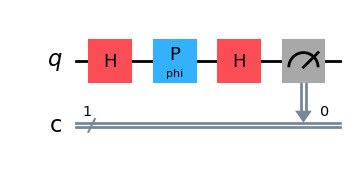

In [23]:
qc=QuantumCircuit(1,1)

qc.h(0) # Slit
qc.p(phi,0) # Phase gate with paramater phi
qc.h(0) 

qc.measure(0,0)
qc.draw('mpl')

```
We transpile the circuit—this means taking the instructions from our quantum circuit and translating them into a set of low-level operations that the simulator (or quantum hardware) can understand and execute.

In [20]:
qc_trans=transpile(qc,backend=simulator)

```
We replace the angle "phi" with different values to cover the full range of positions on the screen, effectively simulating how the interference pattern evolves along the Y-axis.

In [21]:
runs=8192
phi_screen= 10*pi #Screen span

```
We need to generate a list of points along the screen for which we want to run the circuit. For simplicity, we’ll use a uniform distribution of phase values.

In [22]:
phi_list=np.random.uniform(-phi_screen/2,phi_screen/2,runs)

circuits=[]

for phi_val in phi_list:
    qc_sim=qc_trans.assign_parameters({phi:phi_val})
    circuits.append(qc_sim)

In [23]:
job=simulator.run(circuits,shots=100,memory=True)
sim_results=job.result()

In [24]:
hit=[]

for i,circ in enumerate(circuits):
    result=sim_results.get_memory(circ)[0]
    if result == '0':
        hit.append(phi_list[i])

In [25]:
z_hit=np.random.uniform(-1,1,len(hit))

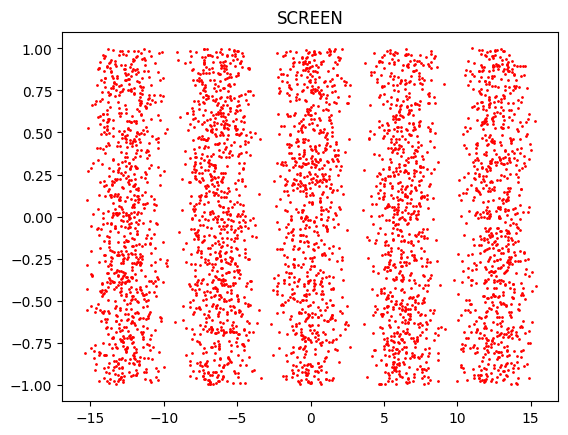

In [26]:
plt.scatter(hit,z_hit,s=1,color='#FF0000')
plt.title('SCREEN')
plt.show()

## Let's Run the Simulation on a Real Quantum Device

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2

Initialize the IBM Quantum service using your access token.

In [ ]:
service=QiskitRuntimeService(
    channel="ibm_quantum",
    token="your-token"
)

C:\Users\USER\AppData\Local\Temp\ipykernel_15564\2656900156.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, "ibm_cloud" and "local" will be the only valid channels. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service=QiskitRuntimeService(


Access a quantum backend that you're authorized to use.

In [26]:
backend=service.backend("ibm_brisbane")
qc_trans=transpile(qc,backend=backend)

In [ ]:
runs=2000 # due to hardware limitation limiting the circuits
phi_screen= 10*pi #Screen span
shots=500

phi_list=np.random.uniform(-phi_screen/2,phi_screen/2,runs)

circuits=[]

for phi_val in phi_list:
    qc_sim=qc_trans.assign_parameters({phi:phi_val})
    circuits.append(qc_sim)

In [39]:
sampler=SamplerV2(mode=backend)

In [ ]:
job = sampler.run(circuits,shots=shots)

result=job.result()

In [ ]:
for i in range(runs):
    res=result[i].data.c.get_counts()
    try:
        if res['0']> res['1']:
            hit.append(phi_list[i])
    except:
        print("KeyError")

In [43]:
z_hit=np.random.uniform(-1,1,len(hit))

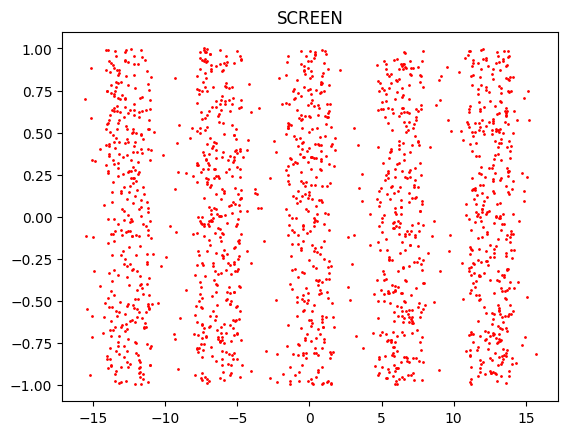

In [44]:
plt.scatter(hit,z_hit,s=1,color='#FF0000')
plt.title('SCREEN')
plt.show()

Some of the unexpected results showing up in the dark parts of the interference pattern are just due to errors and noise in the real quantum hardware—it's not perfect yet!

## Detector in the slit

We can repeat the experiment with a which-path detector, allowing us to measure which slit the particle goes through.

Once again, we apply the Hadamard gate, which places the particle in an equal superposition of passing through the top slit and the bottom slit. However, this time we immediately perform a measurement, which collapses the superposition. As a result, instead of maintaining a coherent superposition, the system collapses into either state $|0\rangle$ or $|1\rangle$, each with 50% probability.

After the measurement, we apply a phase gate. But since the system is already in a definite state ($|0\rangle$ or $|1\rangle$), the phase gate merely introduces a global phase to that state. This is equivalent to a rotation around the Z-axis, which does not affect measurement outcomes. Therefore, we can effectively ignore its impact.

Finally, we apply the last Hadamard gate to attempt recombination of the "waves" from the two slits. But since we had already collapsed the wavefunction earlier, this recombination just results in an equal superposition of $|0\rangle$ and $|1\rangle$, regardless of the phase $\varphi$.

This means we observe a flat (constant) probability distribution on the screen, independent of $\varphi$, and hence no interference pattern appears. 